# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
link = 'https://drive.google.com/uc?id=16O75RYS91xFoscKuY8XaZNw5DtaomL5Z'
df = pd.read_csv(link)

In [3]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [4]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

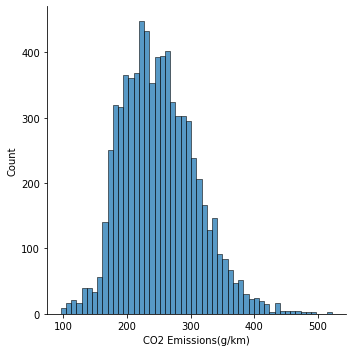

In [5]:
sns.displot(df["CO2 Emissions(g/km)"])

## Praproses Data

In [6]:
#Memilih Beberapa Kolom
selected_columns = ["Engine Size(L)", "Cylinders", "Transmission", "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)" ]
df_sel = df[selected_columns]

In [7]:
#Melakukan praproses kepada kolom Transmission
df_sel["Transmission"] = df_sel["Transmission"].str[:-1].astype(str)

C:\Users\user\AppData\Local\Temp/ipykernel_8696/867765752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["Transmission"] = df_sel["Transmission"].str[:-1].astype(str)


In [8]:
# Mendapatkan Transmission yang Automatic dan Manual Saja
df_sel = df_sel[df_sel.Transmission.isin(["M","A"]) ]

In [9]:
#Melakukan Label Encoding Kepada Kolom Transmission
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_sel['Transmission'] = labelencoder.fit_transform(df_sel['Transmission'])

In [10]:
labelencoder.classes_
#1 for Automatic and 0 for Manual

array(['A', 'M'], dtype=object)

In [11]:
df_sel

,Engine Size(L),Cylinders,Transmission,Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,2.4,4,1,29,221
8,3.7,6,1,24,267
10,2.4,4,1,29,225
13,5.9,12,0,18,359
14,5.9,12,0,18,359
...,...,...,...,...,...
7359,1.5,4,1,41,165
7363,1.4,4,1,37,177
7365,2.0,4,1,32,203
7367,1.4,4,1,40,163


## Melihat Korelasi dan Fitur penting

In [12]:
# Korelasi
(df_sel.corrwith(df_sel["CO2 Emissions(g/km)"])).sort_values(ascending=False)

CO2 Emissions(g/km)            1.000000
Engine Size(L)                 0.863996
Cylinders                      0.828750
Transmission                  -0.270954
Fuel Consumption Comb (mpg)   -0.907359
dtype: float64

In [15]:
X=df_sel.drop(columns = "CO2 Emissions(g/km)")
y = df_sel["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
    test_size=0.3,
    random_state=34341)

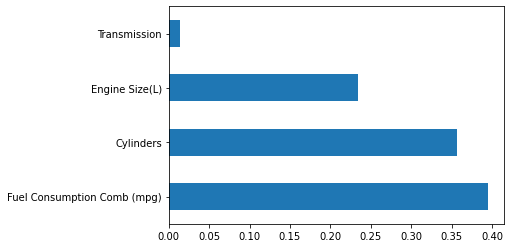

In [16]:
# Tree Method

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Modeling dan Validasi

In [17]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_predict
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
from sklearn.tree import DecisionTreeRegressor
model = XGBRegressor()
scoring = {'MSE' : make_scorer(mean_squared_error),
          'MAE' : make_scorer(mean_absolute_error)}
kfold = KFold(n_splits=5, random_state=1234, shuffle = True)
results_reg = cross_validate(estimator=model,X=X,
                                          y=y,
                                          cv=kfold,
                                          scoring=scoring)
results_reg

{'fit_time': array([1.45231724, 0.10771251, 0.11869144, 0.11070347, 0.10172868]),
 'score_time': array([0.00598454, 0.00698042, 0.00697231, 0.00701904, 0.00698066]),
 'test_MSE': array([ 91.018543  ,  83.15232798, 121.80511261,  93.06710777,
         57.59783922]),
 'test_MAE': array([4.26896029, 4.35163304, 4.88720566, 4.69896708, 4.04141249])}

In [19]:
b_lin = np.sqrt(results_reg.get('test_MSE'))
print('mean_RMSE : ', "%.15f" % (b_lin.mean()))

mean_RMSE :  9.386428520938289


In [20]:
model = model.fit(X_train, y_train)

# Memprediksi nilai y dari X_test
y_predict = model.predict(X_test)

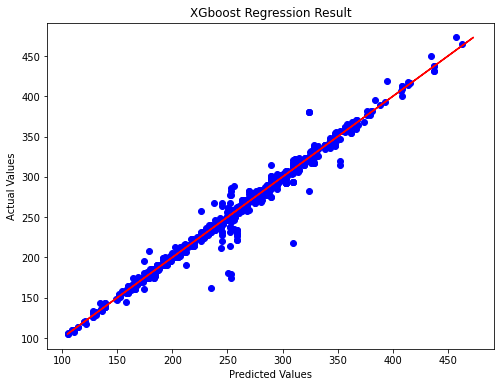

In [21]:
# Aktual vs Prediksi 
fig, ax1 = plt.subplots(figsize=(8,6))
plt.scatter(y_predict,y_test,color='blue')
plt.plot(y_test,y_test,color='red')
plt.title('XGboost Regression Result')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Menyimpan Model

In [23]:
#Menyimpan Model
import joblib
joblib.dump(value=model, filename="Emisi_XGB_model.pkl")

['Emisi_XGB_model.pkl']